# Data Preproccessing

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,precision_score,confusion_matrix
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV,RepeatedStratifiedKFold,cross_val_score
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Import Dataset&Take a Look

In [2]:
df = pd.read_csv("/kaggle/input/water-potability/water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


* It seems that we have some missing data, so we’ve got some work ahead of us! :)


In [3]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


* We have columns with different ranges, for example, the Trihalomethanes column ranges from 0.73 to 124, while the pH column has values between 0 and 14. In the upcoming steps, we will scale these values to enhance our analysis processes.

## Missing Value Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


* We have missing data in the pH, Sulfate, and Trihalomethanes columns. We will fill these gaps with the mean values, thus addressing the missing data without affecting the relationships between the columns.

In [5]:
df["ph"] = df["ph"].fillna(value=df["ph"].mean())
df["Sulfate"] = df["Sulfate"].fillna(value=df["Sulfate"].mean())
df["Trihalomethanes"] = df["Trihalomethanes"].fillna(value=df["Trihalomethanes"].mean())

* Just to be safe, let's double-check!

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


* Everything is ready, let’s move forward!

# Data Visualization

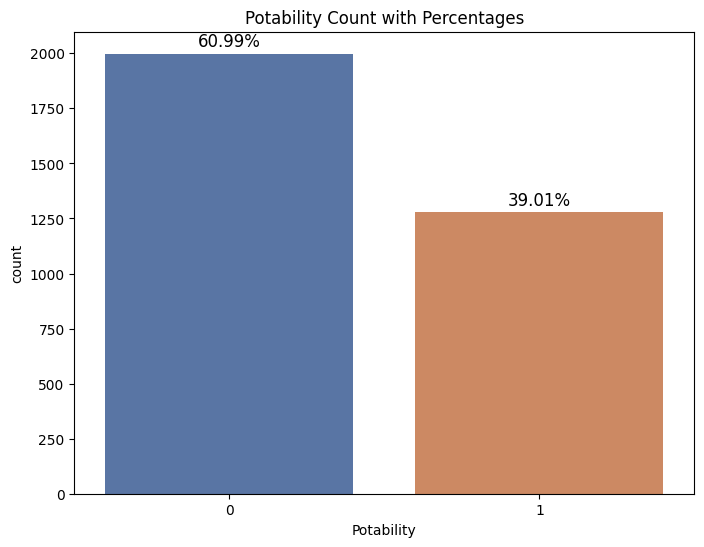

In [7]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x="Potability", palette="deep")

# Calculate percentages
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%'
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'baseline', 
                fontsize = 12, color = 'black', xytext = (0, 5), 
                textcoords = 'offset points')

# Show plot
plt.title("Potability Count with Percentages")
plt.show()

* The majority of our data consists of non-drinkable water samples.

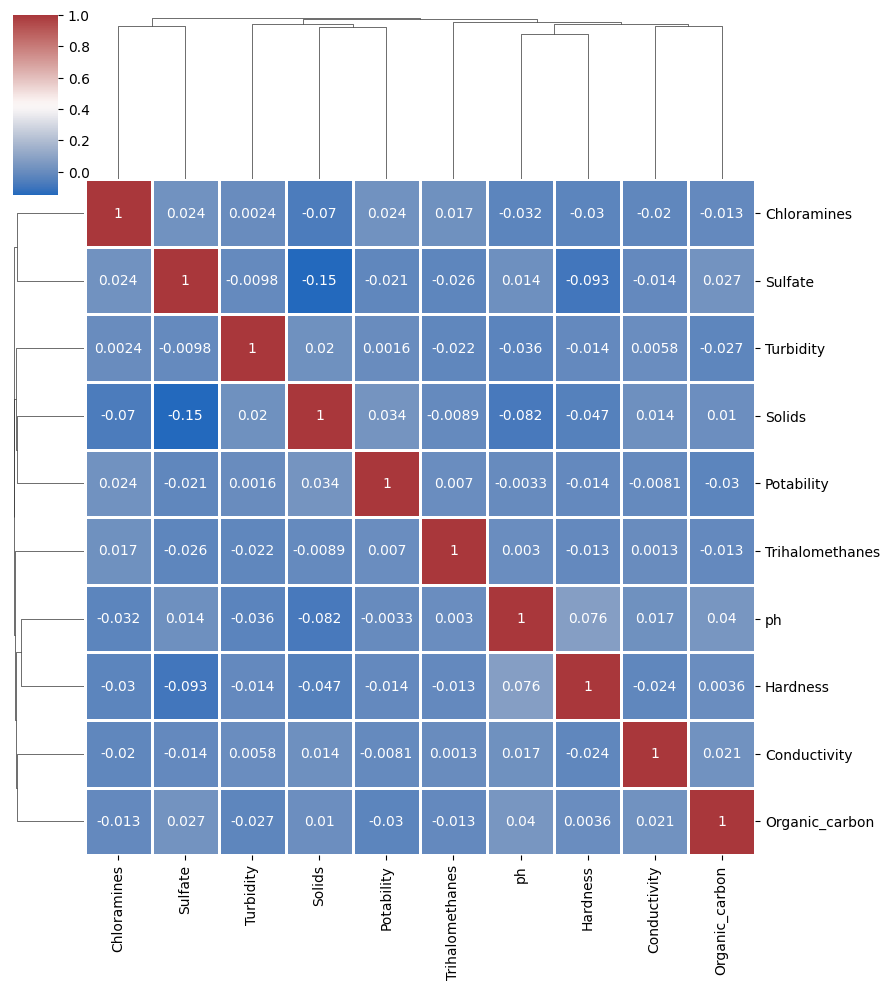

In [8]:
sns.clustermap(df.corr(), cmap="vlag",dendrogram_ratio=(0.1,0.2),annot=True,linewidth=.8,figsize=(9,10))

> There could be several possible reasons for the low correlations. For instance, the water samples in our dataset might have been collected from a wide variety of different sources. A lack of variation in our dataset could also lead to the same issue. Additionally, if the analyzed data was collected at different times or locations, it could contribute to the low correlations. For example, some parameters might vary seasonally.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

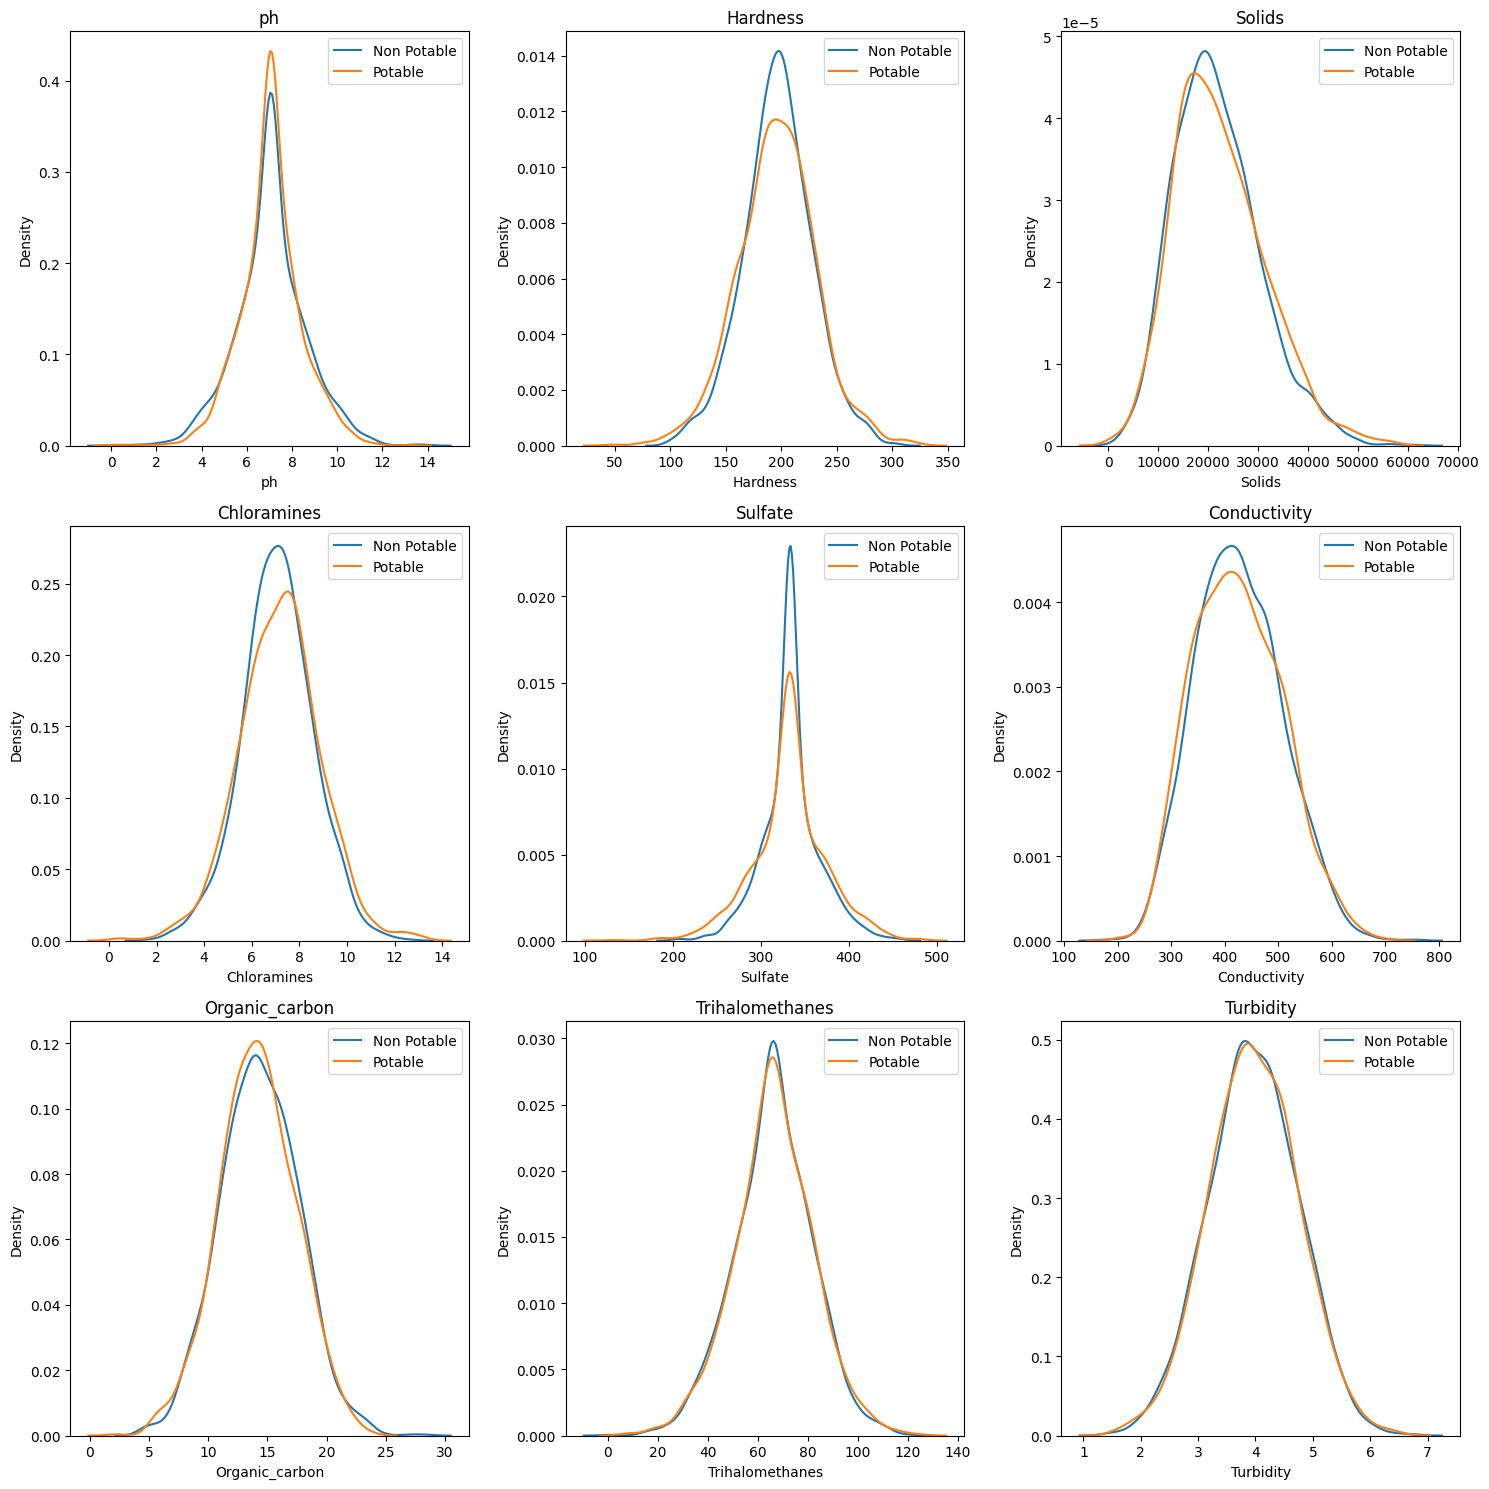

In [9]:
potability_zero = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3,3,ax+1)
    plt.title(col)
    sns.kdeplot(x=potability_zero[col],label = "Non Potable")
    sns.kdeplot(x = potable[col],label = "Potable")
    plt.legend()
plt.tight_layout()

> In some column relationships, the data for drinkable and non-drinkable water appears almost identical. Fortunately, a few values like pH and Sulfate seem like they might help our model.

<Axes: xlabel='ph', ylabel='Potability'>

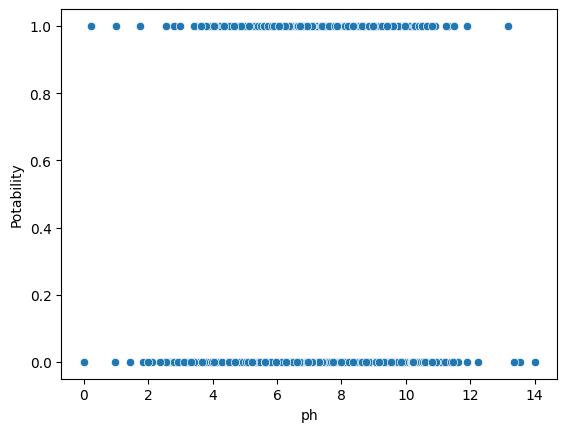

In [10]:
sns.scatterplot(x="ph",y="Potability",data=df)

# Modelling

## Train Test Split

In [11]:
X = df.drop("Potability",axis=1)
y= df["Potability"]

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)

## Scaling

In [13]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Model Building

In [14]:
models =[
    ("Decision Tree Classifier", DecisionTreeClassifier(max_depth=3)),
    ("Random Forest", RandomForestClassifier())
]

In [15]:
finalResults = []

cmList = []

for name, model in models:
    model.fit(X_train_scaled,y_train)
    model_result = model.predict(X_test_scaled)
    score = precision_score(y_test,model_result)
    cm = confusion_matrix(y_test, model_result)

    finalResults.append((name,score))
    cmList.append((name,cm))
finalResults

[('Decision Tree Classifier', 0.6285714285714286),
 ('Random Forest', 0.5733333333333334)]

* Although these are not the worst results in the world, they are definitely not great either. Let's first take a look at the Confusion Matrix, and then we’ll work on improving our model.

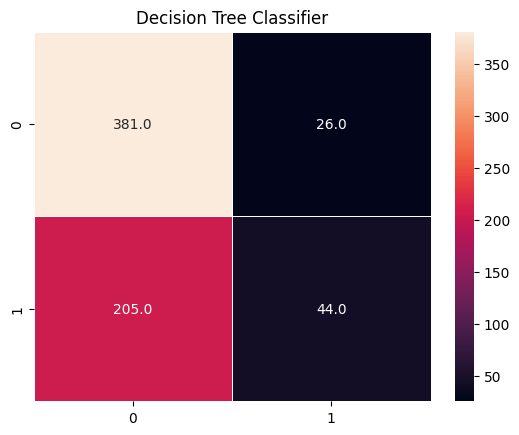

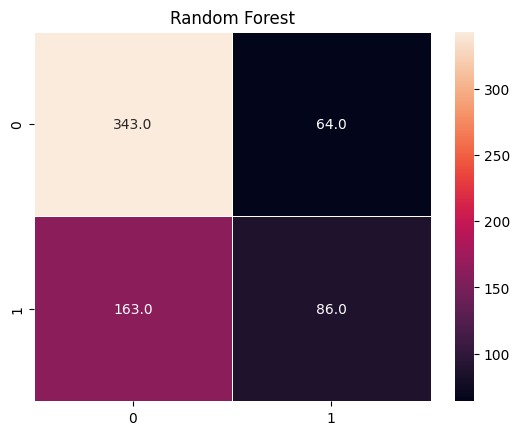

In [16]:
for name, i in cmList:
    plt.figure()
    sns.heatmap(i,annot=True,linewidths=0.7,fmt=".1f")
    plt.title(name)
    plt.show

* Let's try to build something better with Random Forest

## Hyperparameter Search

In [17]:
model_params = {
    "Random Forest" :
    {
        "model": RandomForestClassifier(),
        "params":
        {
            "n_estimators":[10,50,100,200,500],
            "max_features":["auto","sqrt","log2"],
            "max_depth":list(range(1,15,3))
        }
    }
}
model_params

{'Random Forest': {'model': RandomForestClassifier(),
  'params': {'n_estimators': [10, 50, 100, 200, 500],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth': [1, 4, 7, 10, 13]}}}

In [18]:
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
scores=[]
for model_name,params in model_params.items():
    rs = RandomizedSearchCV(params["model"],params["params"],cv=cv,n_iter=10)
    rs.fit(X,y)
    scores.append([model_name,dict(rs.best_params_),rs.best_score_])
scores

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

[['Random Forest',
  {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 13},
  0.6706327964997207]]

> A slight improvement, but still not a result we can call very good. Although trying different models could take us further, we can stop here for now.

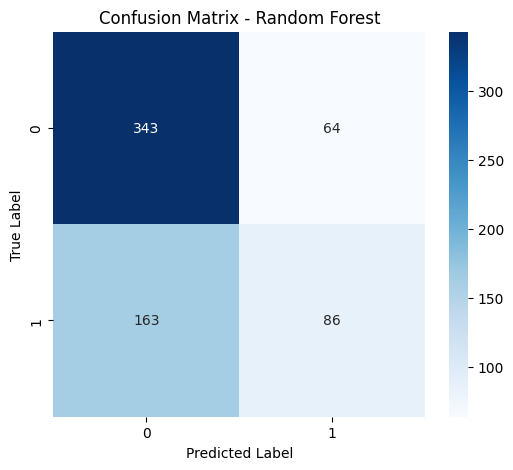

In [19]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()